slope: 1.6303176172822363e-05
intercept: 51.839664229038064


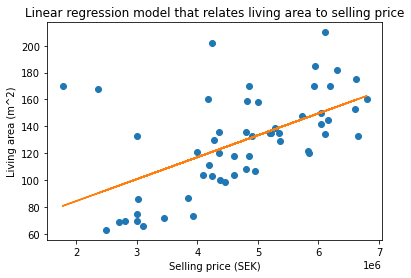

In [37]:
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import statistics 

# Read the csv-file with GDP and extract the data for the chosen year
df = pd.read_csv("./datasets/data_assignment2.csv")
la_code = 'Living_area'
sp_code = 'Selling_price'


la_sp_df = df[[la_code, sp_code]]

# Get gdp and co2 from joined dataframe and set to x and y values
xValues = la_sp_df[sp_code]
yValues = la_sp_df[la_code]

# Plot the arrays
pyplot.plot(xValues, yValues, 'o')

# Make a linear fit to the data
m, b = np.polyfit(xValues, yValues, 1)

# Plot the line
pyplot.plot(xValues, m*xValues + b)
print("slope: " +str(m))
print("intercept: " + str(b))

# Set up labels and title for the plot
pyplot.xlabel('Selling price (SEK)')
pyplot.ylabel('Living area (m^2)')
pyplot.title("Linear regression model that relates living area to selling price")
# Set a variable fig to point to the current figure (the scatter plot)
fig = pyplot.gcf()

# Draw and show the plot
pyplot.draw()
pyplot.show()
# Save the current figure into a png image with the name scatterplot
fig.savefig("linear_livingselling")


